## HW2 | KNN Graph Instruction

#### 1. Fill in all code (under # put your code here)

#### 2. Must use Pandas or Numpy if there is an instruction 

#### 3. Generate the plot that is exactly the same as the table right after each code block

#### 4. Answer the question at the end of this jupyter notebook


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Swiss Banknote Dataset

Six variables measured on 100 genuine and 100 counterfeit old Swiss 1000-franc
bank notes. The data stem from Flury and Riedwyl (1988). The columns correspond
to the following one label and six variables:

0. Conterfeit - 0: genuine bank notes、1: genuine bank notes (Labels)


1. Length - Length of the bank note


2. Left - Height of the bank note, measured on the left


3. Right - Height of the bank note, measured on the right


4. Bottom - Distance of inner frame to the lower border


5. Top - Distance of inner frame to the upper border


6. Diagonal - Length of the diagonal



More details: [Kaggle | Swiss banknote conterfeit detection](https://www.kaggle.com/chrizzles/swiss-banknote-conterfeit-detection)

In [13]:
# Use [Pandas] to import data | banknotes.csv
# Put your code here 

bank = pd.read_csv("banknotes.csv")
label = bank.conterfeit

bank.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8


In [14]:
# Use [Numpy function] to stack the following columns
# The 5-th column "Bottom" as X, the 6-th column "Top" as Y
# Put your code here

data_xy = np.array(bank[["Bottom","Top"]])
data_xy

array([[ 9. ,  9.7],
       [ 8.1,  9.5],
       [ 8.7,  9.6],
       [ 7.5, 10.4],
       [10.4,  7.7],
       [ 9. , 10.1],
       [ 7.9,  9.6],
       [ 7.2, 10.7],
       [ 8.2, 11. ],
       [ 9.2, 10. ],
       [ 7.9, 11.7],
       [ 7.7, 10.5],
       [ 7.9, 10.8],
       [ 7.7, 10.9],
       [ 7.7, 10.8],
       [ 9.3,  8.5],
       [ 8.2,  9.8],
       [ 9. ,  9. ],
       [ 7.4, 11.5],
       [ 8.6, 10. ],
       [ 8.4, 10. ],
       [ 8.1, 10.3],
       [ 8.4, 10.8],
       [ 8.7, 10. ],
       [ 7.4, 10.8],
       [ 8. , 11. ],
       [ 8.9,  9.8],
       [ 9.8,  9.5],
       [ 7.4, 10.5],
       [ 8.3,  9. ],
       [ 7.9, 10.7],
       [ 8.6,  9.1],
       [ 7.7, 10.5],
       [ 8.4, 10.3],
       [ 8.9, 10.6],
       [ 9.4,  9.7],
       [ 8.4,  9.7],
       [ 7.9, 10. ],
       [ 8.5,  9.3],
       [ 8.1,  9.7],
       [ 8.9,  9.4],
       [ 8.8,  9.9],
       [ 9.3,  9. ],
       [ 9. ,  9.8],
       [ 8.2, 10.2],
       [ 8.3, 10.2],
       [ 8.3, 10.2],
       [ 7.3,

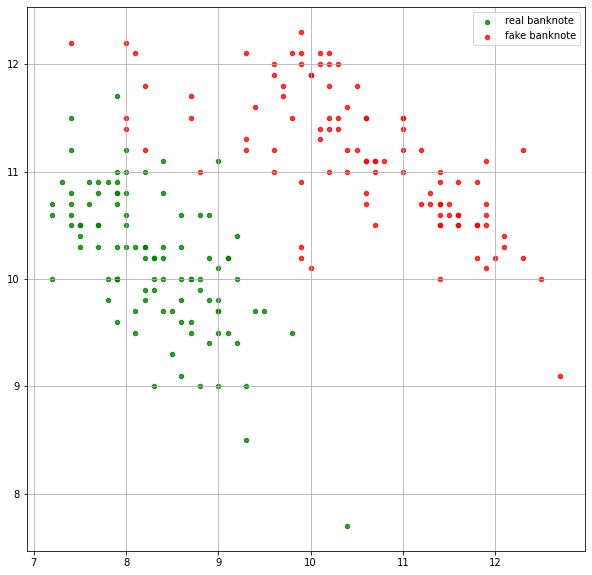

In [15]:
# Use [Numpy function] to find where label = 0 / label = 1

# array([ 0,1,...99])
index_0=np.where(bank["conterfeit"]==0)
# array([ 100,101,...199])
index_1=np.where(bank["conterfeit"]==1)


# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red
# Fill X and Y in the plt.scatter 
# Remember to put on grid and legend and equal axis

plt.figure(figsize = (10, 10))
plt.scatter(data_xy[index_0,0],data_xy[index_0,1],s=20, alpha=0.8,c="green")
plt.scatter(data_xy[index_1,0],data_xy[index_1,1],s=20, alpha=0.8,c="red") 
plt.legend(["real banknote","fake banknote"])
plt.grid()

In [16]:
# Use [Numpy function] to calculate the squared distance matrix between each points

row = data_xy.shape[0] # 200
col = data_xy.shape[1] # 2
dist_sq = np.zeros((row, row)) # array([[0....], [0....]])
for i in range(row):
    for j in range(row):
        s = 0
        for k in range(col):
            # (x1-x2)^2 + (y1-y2)^2
            s += (data_xy[i, k] - data_xy[j, k])**2
        dist_sq[i, j] = round(s,2)

In [17]:
dist_sq

array([[ 0.  ,  0.85,  0.1 , ...,  4.52,  7.09,  4.68],
       [ 0.85,  0.  ,  0.37, ...,  8.81, 12.5 ,  8.41],
       [ 0.1 ,  0.37,  0.  , ...,  5.86,  8.81,  5.86],
       ...,
       [ 4.52,  8.81,  5.86, ...,  0.  ,  0.37,  0.32],
       [ 7.09, 12.5 ,  8.81, ...,  0.37,  0.  ,  1.09],
       [ 4.68,  8.41,  5.86, ...,  0.32,  1.09,  0.  ]])

In [18]:
def nearest_partition(dist_sq, K):
    
    # Use [Numpy function] to return the "K Nearest Neighbor"
    # https://blog.csdn.net/qq_37007384/article/details/88668729
    # 返回將對數組進行排序的索引(距離近到遠的 index )
    # [[  0  82  43 ... 158 131 189]
    #  [  1  39   6 ... 158 131 189]
    #  [  2  86  90 ... 158 131 189]
    #  ...
    #  [197 143 136 ...   7  74  50]
    #  [198 134 182 ...   7  74  50]
    #  [199 196 125 ...  50 189   4]]
    # nearest= np.argsort(dist_sq, axis=1)

    # k-th元素將處於其最終排序位置，所有較小的元素將在其之前移動，而所有較大的元素將在其後面移動
    # nearest_partition=np.argpartition(dist_sq,K+1,axis=1) dist_sq 第 K=1 小的元素位於 nearest_partition 的第 K+1 個位置上
    # (也就是 nearest_partition[K] )
    # argpartition()在 partition（）的基礎上返回排序完成數組的索引號
    # [[  0  82  26 ... 197 198 199]
    #  [ 39   6  16 ... 197 198 199]
    #  [ 90  68   2 ... 197 198 199]
    #  ...
    #  [143 197 136 ...   3   2  99]
    #  [134 182 198 ...   3   2  99]
    #  [196 199 125 ...   3   2  99]]
    nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
    
    return nearest_partition

TypeError: 'numpy.ndarray' object is not callable

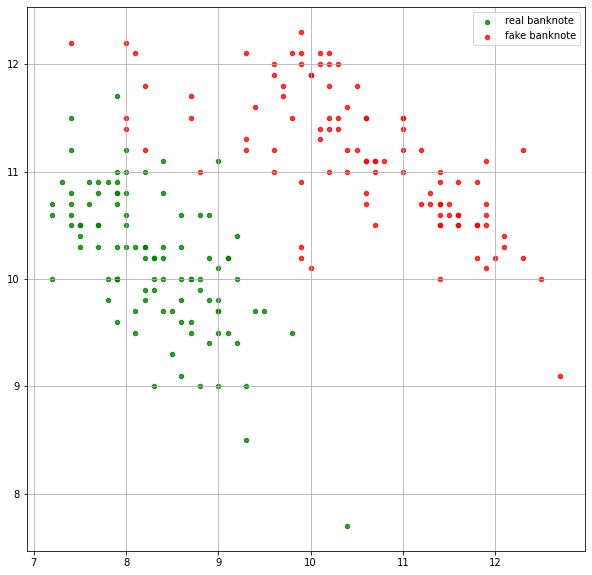

In [26]:
# Use [Numpy function] to find where label = 0 / label = 1

# array([ 0,1,...99])
index_0=np.where(bank["conterfeit"]==0)
# array([ 100,101,...199])
index_1=np.where(bank["conterfeit"]==1)

# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red
# Fill X and Y in the plt.scatter
# Remember to put on grid and legend and equal axis

plt.figure(figsize = (10, 10))
plt.scatter(data_xy[index_0,0],data_xy[index_0,1],s=20, alpha=0.8,c="green")
plt.scatter(data_xy[index_1,0],data_xy[index_1,1],s=20, alpha=0.8,c="red") 
plt.legend(["real banknote","fake banknote"])
plt.grid()
        
# Draw lines from each point to its three nearest neighbors (set K=3)
# Use some zip magic to make it happen (Hint is at below cell)
# You might need loops to generate the plot below
# set parameter [color='black', linewidth=1, alpha=0.5] when you draw lines 

K = 3
for i in range(data_xy.shape[0]):
    nearest_partition(dist_sq, K)
    for j in range(data_xy.shape[0]):
        # plot a line from data_xy[i] to data_xy[j]
        # zip: 將資料從成對的資料包解壓縮到列表
        plt.plot(*zip(data_xy[j], data_xy[i]), color="black",linewidth=1, alpha=0.5)
plot.show()


TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

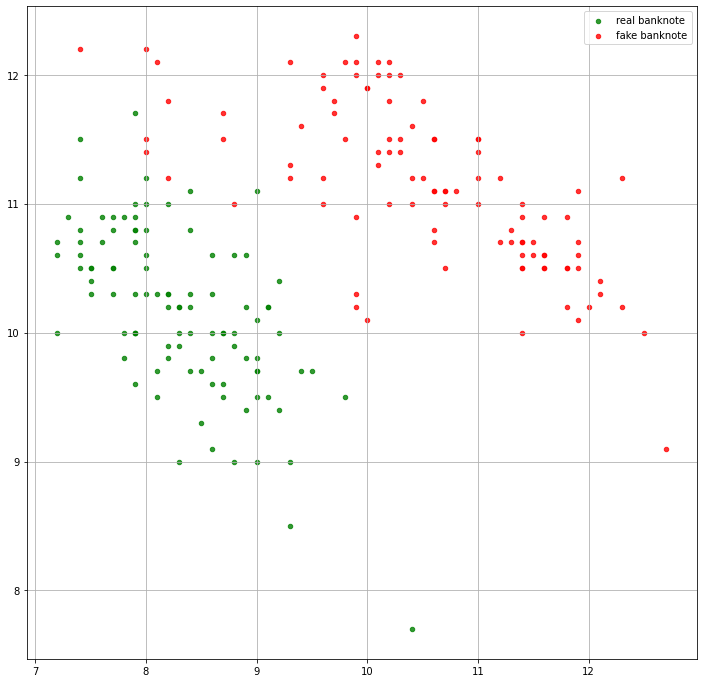

In [20]:
# Set seed = 10 | Random select three dots from data_xy
# Save dots index in varible "target" 
# Don't need to change below three lines

random.seed(10)
target = np.array([random.randint(0, len(data_xy)) for i in range(3)])
text = ['A', 'B', 'C']


# Use [Numpy function] to find where label = 0 / label = 1

# array([ 0,1,...99])
index_0=np.where(bank["conterfeit"]==0)
# array([ 100,101,...199])
index_1=np.where(bank["conterfeit"]==1)


# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red | Target → color = blue
# Fill X and Y in the plt.scatter
# Remember to put on grid and legend and equal axis
# Put your code here

plt.figure(figsize = (12, 12))
# plt.figure(figsize = (10, 10))
plt.scatter(data_xy[index_0,0],data_xy[index_0,1],s=20, alpha=0.8,c="green")
plt.scatter(data_xy[index_1,0],data_xy[index_1,1],s=20, alpha=0.8,c="red") 
plt.legend(["real banknote","fake banknote"])
plt.grid()
plt.scatter(s=60) # Target dots，前面加上 x 和 y


# Draw lines from the selected three point to its three nearest neighbors (set K=3)
# Use some zip magic to make it happen (Hint is at below cell)
# You might need loops to generate the plot below
# set parameter [color='black', linewidth=1, alpha=0.5] when you draw lines 
# Put text A, B, C on each dots (location: Right + 0.1、 Up + 0.1)
# Put your code here


K = 3


### Question：由上圖進行判斷，回答 ABC 三點各自被 KNN 分為哪一群，並說明原因。

### Your Answer：

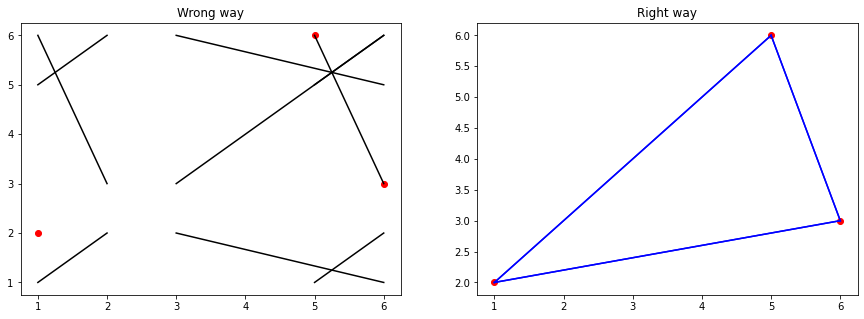

In [21]:
# Hint: How to drow a line between two dots

dots = np.array([[1, 2], [6, 3], [5, 6]])

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Wrong way')        
for i in range(len(dots)): # 3
    plt.scatter(dots[i][0], dots[i][1], color='red')

for i in range(len(dots)):
    for j in range(len(dots)):
        plt.plot(dots[i], dots[j], color = 'black')

plt.subplot(122)
plt.title('Right way')

for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], color='red')

for i in range(len(dots)):
    for j in range(len(dots)):
        plt.plot(*zip(dots[i], dots[j]), color = 'blue')

In [25]:
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
nearest_partition

array([[  0,  82,  26, ..., 197, 198, 199],
       [ 39,   6,  16, ..., 197, 198, 199],
       [ 90,  68,   2, ..., 197, 198, 199],
       ...,
       [143, 197, 136, ...,   3,   2,  99],
       [134, 182, 198, ...,   3,   2,  99],
       [196, 199, 125, ...,   3,   2,  99]], dtype=int64)